# <center> Punchlines as Mirrors: Social Attitudes, Politics, and Biases in the *The New Yorker* Caption Contest

Humor reflects society’s views, stereotypes, and political climate. The New Yorker Caption Contest offers a unique lens into this process, showing what people find acceptable, absurd, or taboo.

## <center> Narrative Flow
- **Introduction:** The Caption Contest as a cultural mirror — humor as social data.
- **Axis 1:** What Is Considered Funny
- **Axis 2:** Professions & politics → humor about authority and power
- **Axis 3:** Social norms → gender roles
- **Conclusion:** Humor not only entertains — it reveals evolving attitudes, biases, and the cultural pulse of society.

> **Idea for website:** Each section should begin with a set of cartoons from the contest to immerse the viewer in humor before moving to analysis.

---

## <center> Axes of Research

### <center> 2. Professions, Politics, and Power

- **Professions in Humor:** Which jobs are depicted most often? Which are ridiculed vs. admired? What stereotypes recur (e.g., lawyers as tricksters, doctors as saviors)?
- **Politics in Humor:** Do captions reflect partisan leanings (Democrat vs. Republican) or mock political figures more broadly? Are political jokes rated differently?
- **Interplay:** Professions like politicians or lawyers sit at the crossroads of both — this axis highlights how authority and social roles are viewed through humor.

**Plots / Statistics:**
- Bar / Word Clouds: Frequency of professions mentioned in captions (“doctor,” “lawyer,” “politician”).
- Histograms / Line Plots: Frequency of professions across time.
- Grouped Bar Charts: Average funniness scores by profession category (healthcare, law, politics, education, etc.).
- Heatmaps: Cross-tab professions × sentiment (positive/negative/neutral).
- Cartoon + Caption Samples: A few annotated cartoons showing how professions are ridiculed.

**For Politics:**
- Timeline of mentions of political figures/parties.
- Sentiment distribution around Democrats vs. Republicans.
- Example “political joke clusters” side by side with major events (e.g., elections).

**Statistical Tests & Models:**
- t-tests / z-tests → Compare funniness scores of politicians vs. other professions.
- Multiple hypothesis testing (FDR/BH) → Control for comparisons across 30+ job categories.
- Network graphs → Co-occurrence of profession keywords with stereotypes (“lawyer–money,” “doctor–death”).
- Linear regression / lmplot → Test if political humor ratings rise around elections.
- Pearsonr / Spearmanr → Correlation between real-world political cycles and joke frequency.


In [32]:
import sys
print(sys.executable)

c:\Users\andra\OneDrive\Desktop\MA1_2025-2026\Applied_data_analysis\project\ada-2025-project-adacore42\_Other\andras_analysis\venv\Scripts\python.exe


In [33]:
#Loading packages (hopefully installed, all is correct version and whatnot)

import os

# Data manipulation
import numpy as np
import pandas as pd
import pickle

# Statistical analysis
import scipy.stats as stats

# Language processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import spacy
import textblob as TextBlob
import contractions
import string
from collections import Counter
from nltk.corpus import wordnet as wn

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('punkt')       # Tokeniser
nltk.download('stopwords')   # Stopwords list
nltk.download('wordnet')     # Lemmatiser
nlp = spacy.load('en_core_web_sm')

stop_words = set(stopwords.words('english')) # Initialise stopwords
lemmatizer = WordNetLemmatizer() # Initialise lemmatiser

[nltk_data] Downloading package punkt to C:\Users\andra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\andra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


---
# <center> Preparing the Data

In this section, the code will preprocess the text of the captions and create a tokenized column suitable for analysis. The preprocessing steps include:

- Converting all text to **lower-case**  
- Removing **stopwords**  
- Eliminating **punctuation** such as dots and commas  
- **Expanding contractions**, e.g., “don’t” → “do not”, “it’s” → “it is”  
- **Correcting typos** to standardize common misspellings (optional but recommended for cleaner analysis)  
- **Removing very short tokens** (e.g., single letters or extremely short words)  
- **Lemmatizing words** to reduce them to their base forms, e.g., “running” → “run”, “better” → “good”  

These steps will prepare the captions for downstream analyses, such as frequency counts, word clouds, sentiment analysis, and extraction of professions or topics from the text.

I will only run this cell once, and save the outcome data in a new file, still within my folder here for the time being. For future work, there will be no need to do this work again. Then, I think this data should be added to the datapreparation step, as I am not doing anything fundamentally bad. I am creating new columns in the dataframes, so only the data becomes larger.


The code is in a __text__ file, it is not necessary to see here. the function to tokenise is included below.

In [34]:
def preprocess_text_list(entry, min_len=2):
    """Preprocess a list of text entries or a single string."""
    if isinstance(entry, list):
        text = " ".join(entry)
    elif isinstance(entry, str):
        text = entry
    else:
        return ""

    # Lowercase
    text = text.lower()

    # Expand contractions
    text = contractions.fix(text)

    # Typo correction
    text = str(TextBlob(text).correct())

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and short tokens
    tokens = [word for word in tokens if word not in stop_words and len(word) >= min_len]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [35]:
# Load clean data
# Check if the path is correct and the file exists

fullldata = '../../data/cleaned_data_prepared.pkl'
if os.path.exists(fullldata):
    with open(fullldata, "rb") as f:
        cleaned_stored_data = pickle.load(f)
    print("Cleaned data loaded successfully.")
else:
    print("File not found.")
dataA_cleaned = cleaned_stored_data["dataA"]
dataC_cleaned = cleaned_stored_data["dataC"]
dataA_startID = cleaned_stored_data["dataA_startID"]
dataA_endID = cleaned_stored_data["dataA_endID"]
dataC_lastGoodID = cleaned_stored_data["dataC_lastGoodID"]


Cleaned data loaded successfully.


---
# <center> Professions in Humor

In this section, we will focus on how different professions are depicted in *The New Yorker* Caption Contest captions. Humor often reflects societal attitudes toward authority, expertise, and social roles, and professions provide a lens into these perceptions.  

## <center> Key Points
- **Frequency of depiction:** Which jobs appear most often in captions?  
- **Stereotypes:** How are certain professions portrayed — are they admired, ridiculed, or caricatured?  
  - Example stereotypes: lawyers as tricksters, doctors as saviors.  

## <center> Analytical Approach
To study professions in humor, we will:
- Count the number of times each profession is mentioned across all captions.  (DONE)
- Visualize the distribution with **bar charts** or **word clouds**.  (MISSING)
- Examine sentiment associated with professions using **heatmaps**.  (MISSING)
- Compare average “funniness” scores by profession category to see which roles tend to be funnier.  (MISSING)
- Annotate examples of cartoons and captions to illustrate recurring jokes and stereotypes. (MISSING)

> This analysis will help us answer the question: *“What are people laughing about when it comes to professions?”* (MISSING)


We are only dealing with nouns when depicting jobs, so, as a first step, we need to extract all nouns from our captions. This will essentially reduce the size of the dataset and save us some more time. To do this, I will use the nltk package.

In [36]:
dataA_cleaned0 = dataA_cleaned.copy()
dataC_cleaned0 = dataC_cleaned.copy()


In [37]:
dataA_cleaned0[0].loc[0, 'cleaned_caption'] = 'congressman obstruction job'

To extract nouns, I used the following function. I removed the actual code which was used to run it and save it as it takes really long to run and I dont want to accidentally start it.

In [38]:
def extract_nouns(text):
    # Ensure the input is a string, not a list
    if not isinstance(text, str):
        text = " ".join(text)
    doc = nlp(text.lower())
    return [token.text for token in doc if token.pos_ in ("NOUN", "PROPN")]

# do not run - takes too long

In [39]:
import sys
import os

# Go up two levels from the current notebook folder
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
print("Project root:", project_root)

# Add the project root to sys.path so Python can find 'src'
if project_root not in sys.path:
    sys.path.append(project_root)

# Now this should work
from src.utils.paths import STORED_DATAPREPNOUNS_PKL_PATH, STORED_DATAPREPTOKENS_PKL_PATH

print(STORED_DATAPREPNOUNS_PKL_PATH)
print(STORED_DATAPREPTOKENS_PKL_PATH)

STORED_DATAPREPNOUNS_PKL_PATH_corr = '../../' / STORED_DATAPREPNOUNS_PKL_PATH
STORED_DATAPREPTOKENS_PKL_PATH_corr = '../../' / STORED_DATAPREPTOKENS_PKL_PATH

print(STORED_DATAPREPNOUNS_PKL_PATH_corr)
print(STORED_DATAPREPTOKENS_PKL_PATH_corr)


Project root: c:\Users\andra\OneDrive\Desktop\MA1_2025-2026\Applied_data_analysis\project\ada-2025-project-adacore42
data\cleaned_data_nouns.pkl
data\cleaned_data_prepared.pkl
..\..\data\cleaned_data_nouns.pkl
..\..\data\cleaned_data_prepared.pkl


In [40]:
# load the new pickle file to verify
noun_datafile = STORED_DATAPREPNOUNS_PKL_PATH_corr
if os.path.exists(noun_datafile):
    with open(noun_datafile, "rb") as f:
        noun_stored_data = pickle.load(f)

# Verify the contents
print("Noun-extracted data loaded successfully.")
dataA1 = noun_stored_data["dataA_nouns"]
dataC1 = noun_stored_data["dataC_nouns"]
dataA_startID1 = noun_stored_data["dataA_startID"]
dataA_endID1 = noun_stored_data["dataA_endID"]
dataC_lastGoodID1 = noun_stored_data["dataC_lastGoodID"]


Noun-extracted data loaded successfully.


--- 
### Preparing External data

Now that I have extracted all the nouns from the tokenised captions, I can think about how to count occupations. This should in theory bring me closer to solving the problem.

I will use multiple datasets that I found on occupations, and I will merge the possible occupations to have a quite comprehensive list. The list will also be expanded by jobs which are frequently mentioned but are not "real" titles, and thus do not appear on each list. Such examples include "Physicist", "Lawyer", "President" and such.

In [41]:
#load occupations
df_occupations = pd.read_csv("final_combined_occupations.csv")
import ast
# Convert each string to a Python list
df_occupations['Synonyms'] = df_occupations['Synonyms'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [42]:
occupations = df_occupations['Occupation']
synonyms_list = df_occupations['Synonyms'].tolist()

# Create a mapping from synonym to occupation
syn_to_occ = {
    synonym.lower(): occ
    for occ, synonyms in zip(occupations, synonyms_list)
    for synonym in synonyms
}

# we need to split the text before processing
def count_occupations(text):
    if isinstance(text, str):
        tokens = text.split()
    else:
        tokens = text
    occ_list = [syn_to_occ.get(tok.lower()) for tok in tokens if tok.lower() in syn_to_occ]
    return Counter(occ_list)

In [43]:
#do this for all dataA parts by adding new column 'occupation_counts'
for i in range(len(dataA1)):
    df = dataA1[i]
    df['occupation_counts'] = df['cleaned_caption'].apply(count_occupations)
    dataA1[i] = df
    #print(f"Processed occupation counts for dataA part {(i+1)/len(dataA1)*100:.2f}%")

# Save the updated data with occupation counts
noun_stored_data_updated = {
    "dataA_nouns": dataA1,
    "dataC_nouns": dataC1,
    "dataA_startID": dataA_startID1,
    "dataA_endID": dataA_endID1,
    "dataC_lastGoodID": dataC_lastGoodID1
}

with open('../../data/cleaned_data_nouns_with_occupations.pkl', "wb") as f:
    pickle.dump(noun_stored_data_updated, f)
print("Updated noun-extracted data with occupation counts saved successfully.")

Updated noun-extracted data with occupation counts saved successfully.


--- 
### First count of occupations in the captions

Below, I will count the occurence of occupations in the captions, and also verify that they occur as nouns.


In [44]:
#open the pickle
with open('../../data/cleaned_data_nouns_with_occupations.pkl', "rb") as f:
    noun_stored_data_loaded = pickle.load(f)

dataA1 = noun_stored_data_loaded["dataA_nouns"]
dataC1 = noun_stored_data_loaded["dataC_nouns"]
dataA_startID1 = noun_stored_data_loaded["dataA_startID"]
dataA_endID1 = noun_stored_data_loaded["dataA_endID"]
dataC_lastGoodID1 = noun_stored_data_loaded["dataC_lastGoodID"]

The most common occupations found in DataA captions are:

[('clown', 6016), ('doctor', 5434), ('president', 4782), ('lawyer', 4279), ('chef', 3840), ('owner', 3501), ('cook', 3320), ('leader', 2414), ('judge', 2346), ('cop', 2181), ('security', 1975), ('employee', 1811), ('agent', 1671), ('member', 1568), ('cowboy', 1446), ('driver', 1364), ('guard', 1343), ('attorney', 1287), ('cooper', 1101), ('cleaner', 945), ('executive', 894), ('chief', 883), ('assistant', 853), ('packing', 830), ('layer', 826), ('solar', 816), ('police', 800), ('critic', 800), ('bitter', 798), ('director', 754), ('hunter', 727), ('slipper', 714), ('jumper', 703), ('display', 697), ('magician', 680), ('grocer', 660), ('printer', 649), ('detective', 644), ('professor', 622), ('secretary', 612), ('film', 607), ('maker', 578), ('clergy', 569), ('scientist', 565), ('seller', 554), ('pitcher', 552), ('dentist', 546), ('politician', 536), ('tenant', 536), ('maintenance', 535), ('runner', 532), ('holder', 530), ('designe

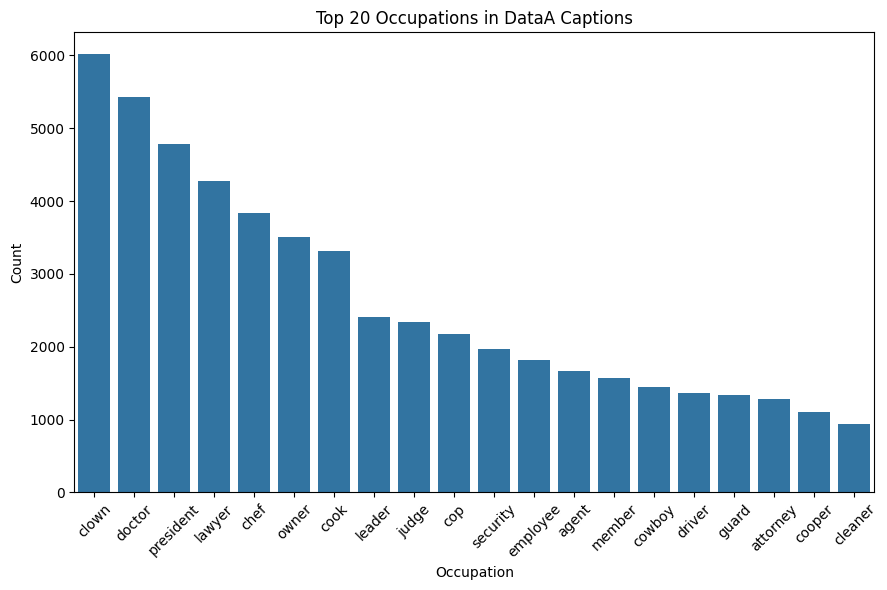

In [45]:
# count occurences of words and make a histogram
occupation_totals = Counter()
for i in range(len(dataA1)):
    df = dataA1[i]
    for counts in df['occupation_counts']:
        occupation_totals.update(counts)

# Show the most common occupations found
print(f"The most common occupations found in DataA captions are:\n")
print(occupation_totals.most_common(100))
print("\n\n")

#histogram of top 20 occupations
top_20 = occupation_totals.most_common(20)
occupations, counts = zip(*top_20)
plt.figure(figsize=(9, 6))
sns.barplot(x=list(occupations), y=list(counts))
plt.xticks(rotation=45)
plt.title("Top 20 Occupations in DataA Captions")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


As we see here, the most common jobs that occur are single word jobs. However, *clown* being the most frequent word seems interesting, as it is not always a job, but could be a way of describing someone. For this reason, we also run the same counting occupations on only the nouns present in our data. Remember, the nouns were extracted previously!

Processed occupation counts for nouns in dataA part 0.26%
Processed occupation counts for nouns in dataA part 0.52%
Processed occupation counts for nouns in dataA part 0.78%
Processed occupation counts for nouns in dataA part 1.04%
Processed occupation counts for nouns in dataA part 1.30%
Processed occupation counts for nouns in dataA part 1.56%
Processed occupation counts for nouns in dataA part 1.82%
Processed occupation counts for nouns in dataA part 2.08%
Processed occupation counts for nouns in dataA part 2.34%
Processed occupation counts for nouns in dataA part 2.60%
Processed occupation counts for nouns in dataA part 2.86%
Processed occupation counts for nouns in dataA part 3.12%
Processed occupation counts for nouns in dataA part 3.39%
Processed occupation counts for nouns in dataA part 3.65%
Processed occupation counts for nouns in dataA part 3.91%
Processed occupation counts for nouns in dataA part 4.17%
Processed occupation counts for nouns in dataA part 4.43%
Processed occu

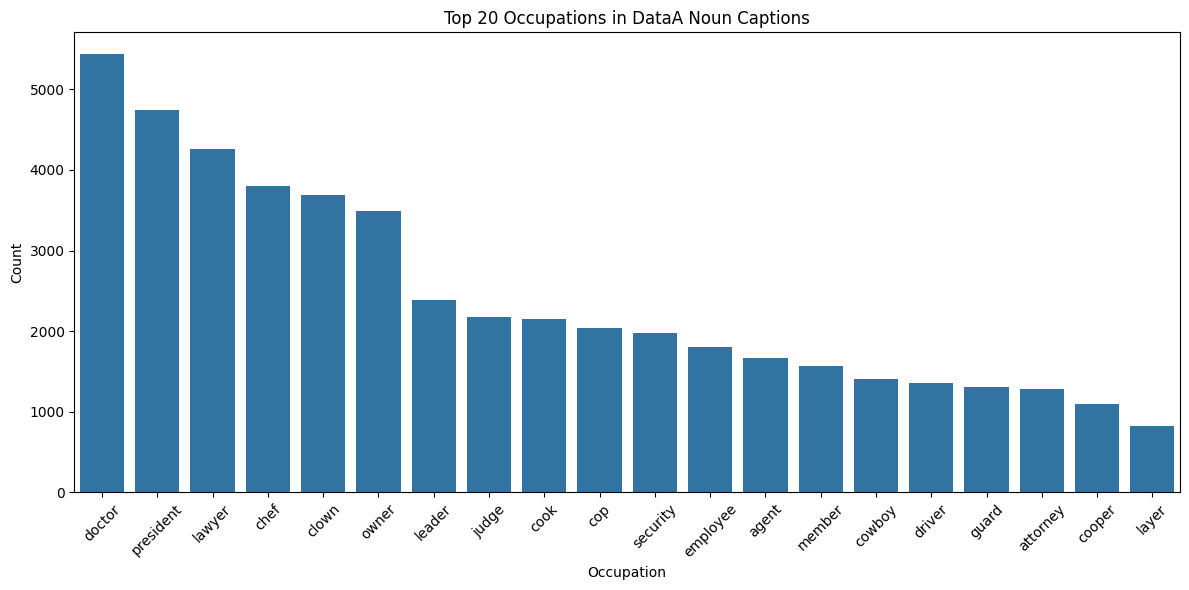

In [46]:
#go over the nouns columns and see which occupations are present
for i in range(len(dataA1)):
    df = dataA1[i]
    df['occupation_counts_nouns'] = df['captions_nouns'].apply(count_occupations)
    dataA1[i] = df
    print(f"Processed occupation counts for nouns in dataA part {(i+1)/len(dataA1)*100:.2f}%")

#count occurences of words and make a histogram for nouns occupation counts
occupation_totals_nouns = Counter()
for i in range(len(dataA1)):
    df = dataA1[i]
    for counts in df['occupation_counts_nouns']:
        occupation_totals_nouns.update(counts)
# Show the most common occupations found
print(occupation_totals_nouns.most_common(100))
#histogram of top 20 occupations for nouns
top_20_nouns = occupation_totals_nouns.most_common(20)
occupations_nouns, counts_nouns = zip(*top_20_nouns)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(occupations_nouns), y=list(counts_nouns))
plt.xticks(rotation=45)
plt.title("Top 20 Occupations in DataA Noun Captions")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Yay! we see that clown is not the funniest, though still quite high up there. To be continued...

---
### 'Temporal' Distribution of occupations

I will now check in which contests do occupations occur and how often they do in ratio with captions that have no comments.

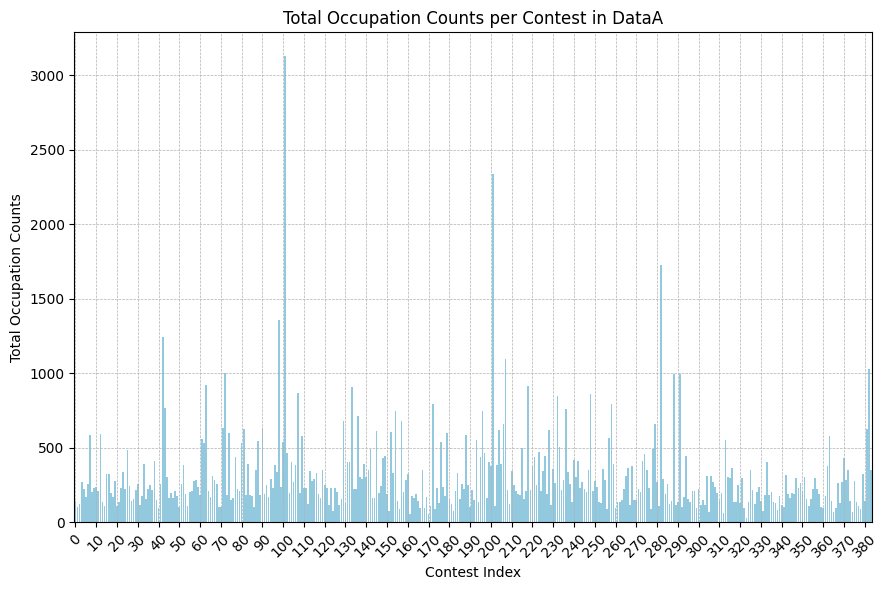

In [47]:
#In which contests do occupations appear most frequently?
occupation_counts_per_contest = []
for i in range(len(dataA1)):
    df = dataA1[i]
    total_occupations = sum(len(counts) for counts in df['occupation_counts'])
    occupation_counts_per_contest.append(total_occupations)

#plot
plt.figure(figsize=(9, 6))
sns.barplot(x=list(range(len(occupation_counts_per_contest))), y=occupation_counts_per_contest, color='skyblue')
plt.title("Total Occupation Counts per Contest in DataA")
plt.xlabel("Contest Index")
plt.ylabel("Total Occupation Counts")
plt.xticks(np.arange(0,len(occupation_counts_per_contest), step = 10), rotation=45)
plt.tight_layout()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()


We can also check if there are some captions with no occupations at all. Indeed, the code below shows there are no contests with no occupation mentioned. However, this may be due to the list used for occupations, or the way occupations are identified (maybe the list is still not perfect).

In [48]:
# Are there some contests with no occupations at all?
contests_with_no_occupations = [i for i, count in enumerate(occupation_counts_per_contest) if count == 0]

print(f"Contests with no occupations found: {contests_with_no_occupations}")

Contests with no occupations found: []


Lets check the temporal evolution of the number of job occurences in captions.

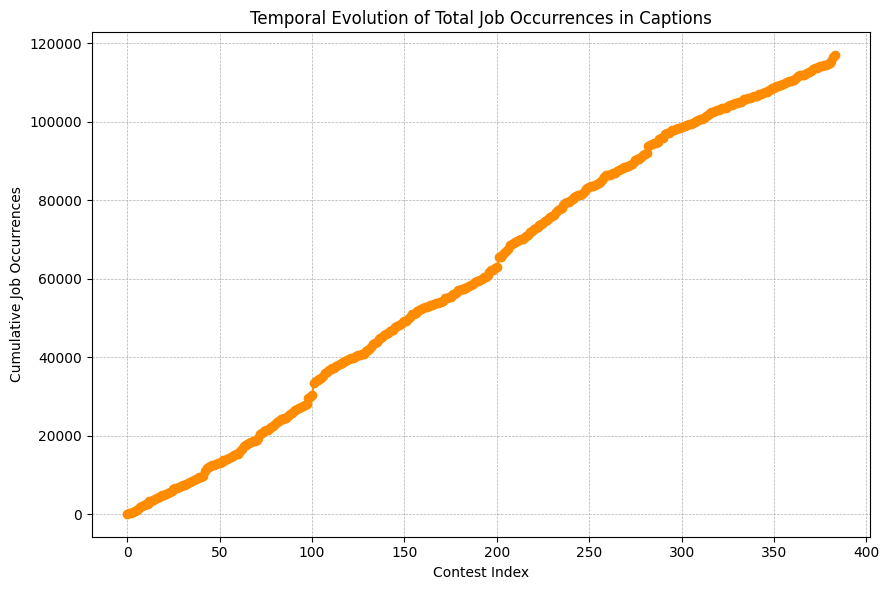

In [49]:
# Temporal evolution of total number of job occurences in captions
sum_occupations_over_time = []
sum_ = 0
for i in range(len(dataA1)):
    sum_ += occupation_counts_per_contest[i]
    sum_occupations_over_time.append(sum_)

plt.figure(figsize=(9, 6))
plt.plot(sum_occupations_over_time, marker='o', linestyle='-', color='darkorange')
plt.title("Temporal Evolution of Total Job Occurrences in Captions")
plt.xlabel("Contest Index")
plt.ylabel("Cumulative Job Occurrences")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Let us look at the ratio of occupation mentions in captions to captions with no mention of occupations. 

C:\Users\andra\AppData\Local\Temp\ipykernel_18008\1246036046.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_with = np.sum(1 for counts in df['occupation_counts'] if len(counts) > 0)
C:\Users\andra\AppData\Local\Temp\ipykernel_18008\1246036046.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_without = np.sum(1 for counts in df['occupation_counts'] if len(counts) == 0)


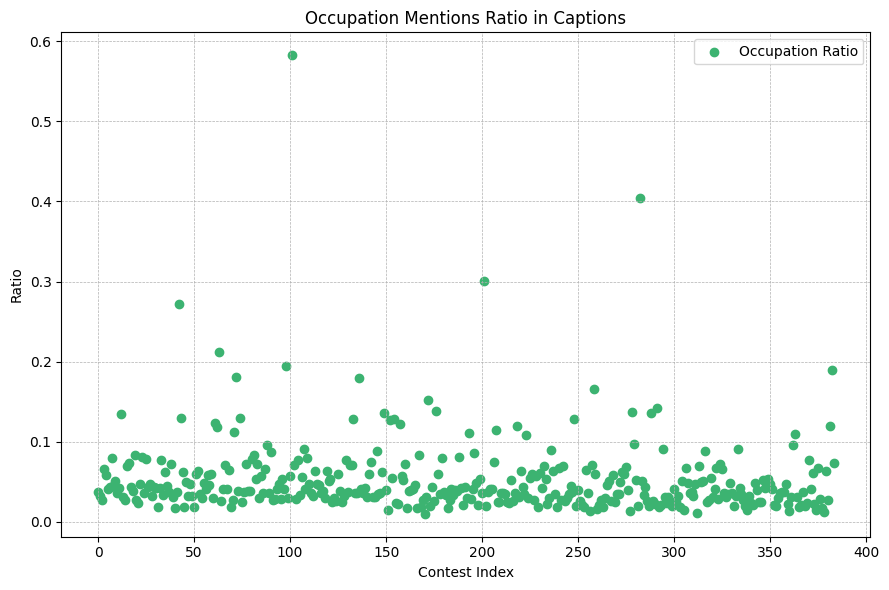

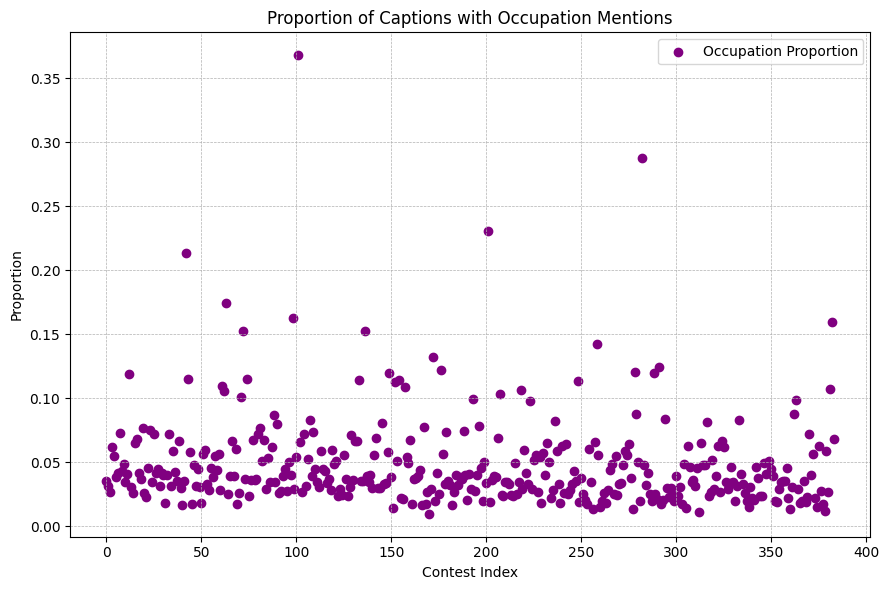

In [50]:
# ratio of captions with occupations to captions without occupations
caption_counts_with_occupations = []
caption_counts_without_occupations = []
for i in range(len(dataA1)):
    df = dataA1[i]
    count_with = np.sum(1 for counts in df['occupation_counts'] if len(counts) > 0)
    count_without = np.sum(1 for counts in df['occupation_counts'] if len(counts) == 0)
    caption_counts_with_occupations.append(count_with)
    caption_counts_without_occupations.append(count_without)

# Plot the ratios of captions with occupations to those without
ratios = [with_occ / (without_occ + 1e-6) for with_occ, without_occ in zip(caption_counts_with_occupations, caption_counts_without_occupations)]
plt.figure(figsize=(9, 6))
plt.scatter(np.arange(len(ratios)), ratios, marker='o', color='mediumseagreen', label='Occupation Ratio')
plt.title("Occupation Mentions Ratio in Captions")
plt.xlabel("Contest Index")
plt.ylabel("Ratio")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.show()

#proportion of captions with occupations to total captions
proportions = [with_occ / (with_occ + without_occ + 1e-6) for with_occ, without_occ in zip(caption_counts_with_occupations, caption_counts_without_occupations)]
plt.figure(figsize=(9, 6))
plt.scatter(np.arange(len(proportions)), proportions, marker='o', color='purple', label='Occupation Proportion')
plt.title("Proportion of Captions with Occupation Mentions")
plt.xlabel("Contest Index")
plt.ylabel("Proportion")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.show()


Finally, let us look at how jobs occur in the description of images and the uncanny descriptions too. These are all in `dataC`, and we can compare to the evolution found in the captions in `dataA`. I will count the number of unique jobs that occur in an image description. Note that synonyms are not dealt with right now, so "policeman" and "cop" count as different jobs.

In [51]:
#remove all NaN values
print(len(dataC1))
dataC1 = dataC1.dropna(subset='image_descriptions').reset_index(drop=True)
print(len(dataC1))

384
240


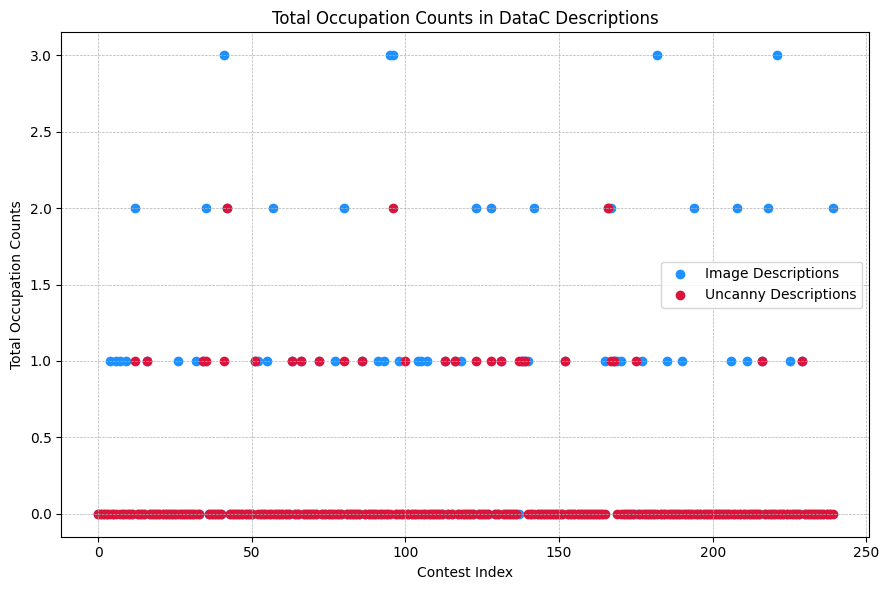

Maximum occupation count in image descriptions at contest index: 41 with count 3
Maximum occupation count in uncanny descriptions at contest index: 42 with count 2


The maximum image description row is: 
num_captions                                                                         5154.0
num_votes                                                                          928060.0
image_locations                                                       [a bar, a restaurant]
image_descriptions                        [A clown stares at a shop owner from outside t...
image_uncanny_descriptions                [It is weird for the clown to stare at someone...
entities                                  [https://en.wikipedia.org/wiki/Ownership, http...
questions                                 [Why is the clown staring at the clerk?, Why i...
date                                                                    2017-02-05 00:00:00
cleaned_image_locations                                    

In [52]:
# Count jobs in dataC descriptions and uncanny descriptions
dataC1['occupation_counts_image_descriptions'] = dataC1['cleaned_image_descriptions'].apply(count_occupations)
dataC1['occupation_counts_uncanny_descriptions'] = dataC1['cleaned_image_uncanny_descriptions'].apply(count_occupations)

nr_occupations_image_descriptions = [len(dataC1.loc[i, 'occupation_counts_image_descriptions']) for i in range(len(dataC1))]
nr_occupations_uncanny_descriptions = [len(dataC1.loc[i, 'occupation_counts_uncanny_descriptions']) for i in range(len(dataC1))]

plt.figure(figsize=(9, 6))
plt.scatter(np.arange(len(nr_occupations_image_descriptions)), nr_occupations_image_descriptions, marker='o', color='dodgerblue', label='Image Descriptions')
plt.scatter(np.arange(len(nr_occupations_uncanny_descriptions)), nr_occupations_uncanny_descriptions, marker='o', color='crimson', label='Uncanny Descriptions')
plt.title("Total Occupation Counts in DataC Descriptions")
plt.xlabel("Contest Index")
plt.ylabel("Total Occupation Counts")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.show()

#max at which contest
max_image_desc_index = np.argmax(nr_occupations_image_descriptions)
max_uncanny_desc_index = np.argmax(nr_occupations_uncanny_descriptions)
print(f"Maximum occupation count in image descriptions at contest index: {max_image_desc_index} with count {nr_occupations_image_descriptions[max_image_desc_index]}")
print(f"Maximum occupation count in uncanny descriptions at contest index: {max_uncanny_desc_index} with count {nr_occupations_uncanny_descriptions[max_uncanny_desc_index]}")

print("\n\nThe maximum image description row is: ")
print(dataC1.loc[max_image_desc_index])
print("\n\nThe maximum uncanny description row is: ")
print(dataC1.loc[max_uncanny_desc_index])


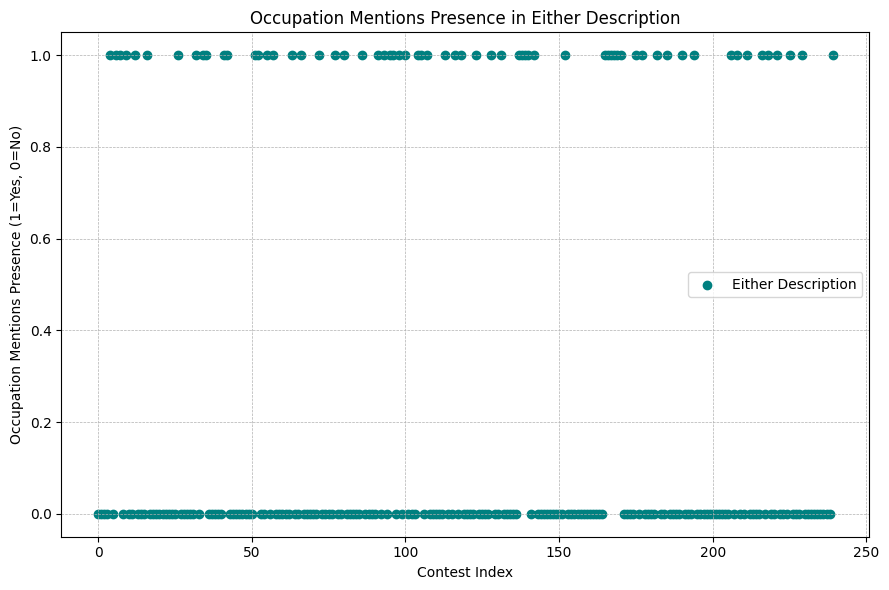

Number of contests with occupation mentions in either description: 64 out of 240


In [53]:
# Counting presence of occupations in either description
def has_occupation(d):
    return isinstance(d, dict) and len(d) > 0

occupation_presence_image_descriptions = dataC1['occupation_counts_image_descriptions'].apply(has_occupation).astype(int)
occupation_presence_uncanny_descriptions = dataC1['occupation_counts_uncanny_descriptions'].apply(has_occupation).astype(int)

# Either one has occupations
either = (occupation_presence_image_descriptions | occupation_presence_uncanny_descriptions).astype(int)

# Plot
plt.figure(figsize=(9, 6))
plt.scatter(np.arange(len(either)), either, color='teal', label='Either Description')
plt.title("Occupation Mentions Presence in Either Description")
plt.xlabel("Contest Index")
plt.ylabel("Occupation Mentions Presence (1=Yes, 0=No)")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.show()

print(f"Number of contests with occupation mentions in either description: {either.sum()} out of {len(either)}")


So we see that we only have occupations occuring in the image (or at least its description) in $27\%$ of the captions, while we have jobs occuring in every caption contest. A future comparison would be to look at how the mentioned jobs in the metadata influence the number of occurences of jobs in captions, and if the jobs in the captions are the same as in the metadata or not. Remember to keep in mind, the metadata is much smaller than the caption dataset, so compare only relevant contests!